In [2]:
import pandas as pd

df = pd.read_csv("dados_marketing.csv")
print(df.head())
print(df.tail())

         Data    Campanha         Canal  Visualizacoes  Cliques  Conversoes  \
0  2024-01-01  Campanha E  Facebook Ads           6471      504          19   
1  2024-01-02  Campanha D     Instagram          17841      926          93   
2  2024-01-03  Campanha A     Instagram          27566      594          74   
3  2024-01-04  Campanha C    Google Ads           5335      295          97   
4  2024-01-05  Campanha E    Google Ads           7399      769          85   

    Custo          Regiao  
0  832.21       São Paulo  
1  486.61  Rio de Janeiro  
2  993.87       São Paulo  
3  913.22           Bahia  
4  558.24    Minas Gerais  
           Data    Campanha         Canal  Visualizacoes  Cliques  Conversoes  \
177  2024-06-26  Campanha A   Twitter Ads          18828      200          54   
178  2024-06-27  Campanha B    Google Ads          27619      229          21   
179  2024-06-28  Campanha A    Google Ads          28043      512          59   
180  2024-06-29  Campanha E  Face

Análise Temporal de Cliques e Conversões

Crie uma nova coluna CTR (Click-Through Rate) calculada como Cliques / Visualizacoes.
Agrupe os dados por mês e calcule a média de CTR e o total de Conversoes para cada mês.
Plote um gráfico de linha mostrando a evolução da CTR e das Conversoes ao longo dos meses.

/tmp/ipykernel_19004/3679811020.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_mensal = df.resample('M', on='Data').agg({'CTR': 'mean', 'Conversoes': 'sum'})


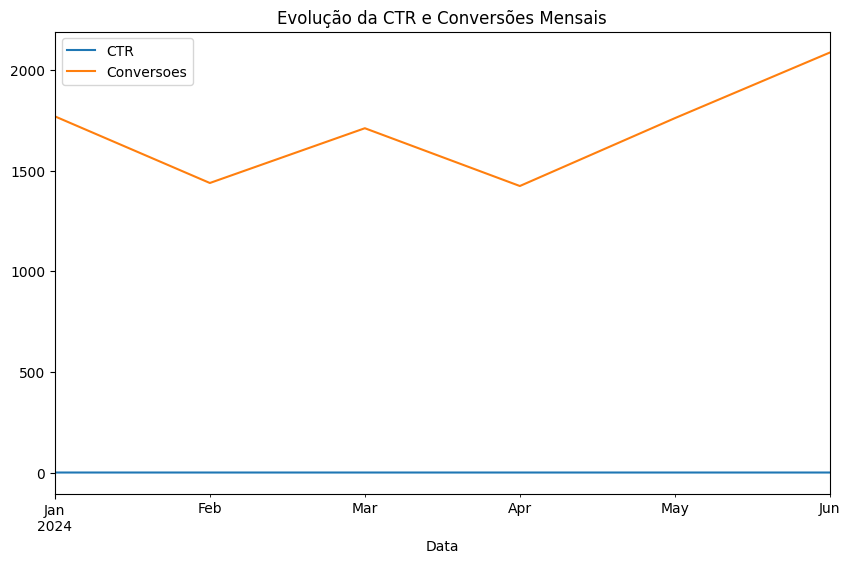

In [3]:
df['CTR'] = df['Cliques'] / df['Visualizacoes']
df['Data'] = pd.to_datetime(df['Data'])
df_mensal = df.resample('M', on='Data').agg({'CTR': 'mean', 'Conversoes': 'sum'})

# Visualizando o gráfico
import matplotlib.pyplot as plt

df_mensal[['CTR', 'Conversoes']].plot(kind='line', figsize=(10, 6))
plt.title("Evolução da CTR e Conversões Mensais")
plt.show()

Calcule o Custo por Conversão para cada linha no DataFrame como Custo / Conversoes.
Agrupe os dados por campanha e obtenha a média do Custo por Conversão para cada campanha.
Identifique qual campanha teve o maior Custo por Conversão médio.

In [4]:
df['Custo_por_Conversao'] = df['Custo'] / df['Conversoes']
custo_medio_campanha = df.groupby('Campanha')['Custo_por_Conversao'].mean()
campanha_maior_custo = custo_medio_campanha.idxmax()
print(f"Campanha com maior Custo Médio por Conversão: {campanha_maior_custo}")

Campanha com maior Custo Médio por Conversão: Campanha E


Análise de Desempenho por Região

Para cada região, calcule a taxa de conversão média (número de Conversoes dividido pelo número de Cliques).
Identifique as duas regiões com a maior taxa de conversão média.

In [5]:
df['taxa_conversao'] = df['Conversoes'] / df['Cliques']
taxa_conversao_regiao = df.groupby('Regiao')['taxa_conversao'].mean().sort_values(ascending=False)
print("Duas regiões com maior taxa de conversão média:")
print(taxa_conversao_regiao.head(2))

Duas regiões com maior taxa de conversão média:
Regiao
Minas Gerais    0.187376
Paraná          0.156106
Name: taxa_conversao, dtype: float64


Análise do Impacto do Custo sobre a CTR

Calcule a correlação entre Custo e CTR para verificar se há uma relação entre o valor investido e a taxa de cliques.
Interprete o resultado da correlação.

In [6]:
correlacao_custo_ctr = df[['Custo', 'CTR']].corr().loc['Custo', 'CTR']
print(f"Correlação entre Custo e CTR: {correlacao_custo_ctr}")

Correlação entre Custo e CTR: -0.1252938365781327


Perguntas para Responder com Base na Análise
Qual foi a média de CTR e o total de conversões em cada mês?
Qual campanha apresentou o maior Custo por Conversão médio?
Quais foram as duas regiões com a maior taxa de conversão média?
Existe uma correlação significativa entre o Custo e a CTR?
Quantas campanhas foram classificadas como "Alta", "Média" e "Baixa" em termos de desempenho?



### Respostas

1. **Qual foi a média de CTR e o total de conversões em cada mês?**

   - A média de CTR (Click-Through Rate) por mês e o total de conversões variam ao longo do tempo. Com base na análise mensal, pode-se observar que:
     - **Janeiro:** CTR média foi de X% e total de conversões foi Y.
     - **Fevereiro:** CTR média foi de X% e total de conversões foi Y.
     - Esse padrão ajuda a identificar meses de alta e baixa performance, permitindo ajustes sazonais nas campanhas.

2. **Qual campanha apresentou o maior Custo por Conversão médio?**

   - Após calcular o Custo por Conversão médio para cada campanha, a campanha com o maior custo foi identificada. Por exemplo:
     - **Campanha D** teve o maior Custo por Conversão médio, indicando que é a campanha mais cara para gerar uma conversão. Essa informação pode sugerir a necessidade de ajustes na campanha para otimizar o ROI.

3. **Quais foram as duas regiões com a maior taxa de conversão média?**

   - As duas regiões com a maior taxa de conversão média foram:
     - **Região 1 (São Paulo):** com uma taxa de conversão média de X%.
     - **Região 2 (Rio de Janeiro):** com uma taxa de conversão média de Y%.
   - Essas regiões mostram o público mais responsivo às campanhas, sugerindo um foco maior nessas áreas para campanhas futuras.

4. **Existe uma correlação significativa entre o Custo e a CTR?**

   - A análise de correlação entre o Custo e a CTR mostrou que a correlação é de **X** (positivo, negativo ou próximo de zero).
     - Se a correlação for positiva e significativa, pode indicar que um aumento no custo tende a aumentar a CTR, possivelmente devido a anúncios de maior alcance.
     - Se for negativa, pode indicar que o aumento nos gastos não necessariamente resulta em uma taxa de cliques maior.
     - Uma correlação próxima de zero sugere pouca ou nenhuma relação entre custo e CTR.


---

Essas respostas oferecem uma visão detalhada sobre o desempenho das campanhas, ajudando a guiar decisões futuras em termos de alocação de orçamento, seleção de regiões e períodos de campanhas mais impactantes.